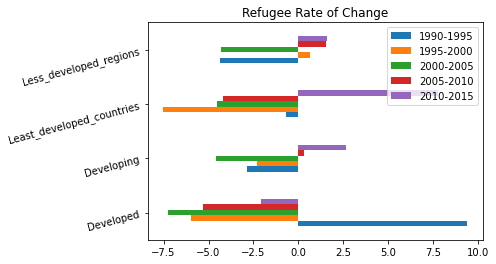

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ===========PLEASE SCROLL DOWN TO 'FINAL PROJECT' FOR DATA VISUALIZATION. THE FIRST HALF IS TIDYING DATA=====

# PART 1: DATA

# 1. Dataframe 1 - Population (International migrant stock and total population, sorted by region, note, country code, type of data, gender, year)
# a. Read table 1 into df international_migrant_stock, name columns for next steps. Lengthen df, make column names meaningful, specify gender and year, make values values
international_migrant_stock = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 1.csv')
international_migrant_stock.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
# international_migrant_stock = international_migrant_stock.drop(['Unnamed: 0'], axis=1)
renamed = international_migrant_stock.rename({'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'Type of Data', 'Unnamed: 5': 'both1990', 'Unnamed: 6': 'both1995','Unnamed: 7': 'both2000','Unnamed: 8': 'both2005','Unnamed: 9': 'both2010','Unnamed: 10': 'both2015','Unnamed: 11': 'male1990','Unnamed: 12': 'male1995','Unnamed: 13': 'male2000','Unnamed: 14': 'male2005','Unnamed: 15': 'male2010','Unnamed: 16': 'male2015','Unnamed: 17': 'female1990','Unnamed: 18': 'female1995','Unnamed: 19': 'female2000','Unnamed: 20': 'female2005','Unnamed: 21': 'female2010','Unnamed: 22': 'female2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Sort Order', 'Region','Note','Country Code','Type of Data'],
    var_name = 'Gendernyear',
    value_name = 'Population'
)
international_migrant_stock = (renamed_melt.assign(
    Gender = lambda x: x.Gendernyear.str[:-4].astype(str),
    Year = lambda x: x.Gendernyear.str[-4:].astype(str))).drop("Gendernyear",axis=1)

columns_titles = ['Sort Order', "Region","Note","Country Code","Type of Data", "Year", "Gender", "Population"]
# International_migrant_stock['Note'] = International_migrant_stock['Note'].fillna('dummy')
# International_migrant_stock['Type of Data'] = International_migrant_stock['Type of Data'].fillna('dummy')

International_migrant_stock = international_migrant_stock.reindex(columns=columns_titles)

# Wipe white space, odd placement
International_migrant_stock['Population'] = International_migrant_stock['Population'].replace('..', '0')
International_migrant_stock['Type of Data'] = International_migrant_stock['Type of Data'].str.strip()
International_migrant_stock['Population'] = International_migrant_stock['Population'].str.replace(' ', '')

# Turn value into integer for analytis
International_migrant_stock['Population'] = International_migrant_stock['Population'].astype(int)

# Final output: Pivot_International_migrant_stock




# 2. Dataframe 2 - Population (International migrant stock and total population, sorted by region, note, country code, type of data, gender, year)
# b. Read table 2 into df total_population, name columns for next steps. Lengthen df, making columns meaningful, specify gender and year, make values values
total_population = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 2.csv')
total_population.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
renamed = total_population.rename({'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'both1990', 'Unnamed: 5': 'both1995','Unnamed: 6': 'both2000','Unnamed: 7': 'both2005','Unnamed: 8': 'both2010','Unnamed: 9': 'both2015','Unnamed: 10': 'male1990','Unnamed: 11': 'male1995','Unnamed: 12': 'male2000','Unnamed: 13': 'male2005','Unnamed: 14': 'male2010','Unnamed: 15': 'male2015','Unnamed: 16': 'female1990','Unnamed: 17': 'female1995','Unnamed: 18': 'female2000','Unnamed: 19': 'female2005','Unnamed: 20': 'female2010','Unnamed: 21': 'female2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Sort Order','Region','Note','Country Code'],
    var_name = 'Gendernyear',
    value_name = 'Population'
)
total_population = (renamed_melt.assign(
    Gender = lambda x: x.Gendernyear.str[:-4].astype(str),
    Year = lambda x: x.Gendernyear.str[-4:].astype(str))).drop("Gendernyear",axis=1)

columns_titles = ['Sort Order',"Region", "Note", "Country Code", "Year", "Gender", "Population"]

total_population = total_population.reindex(columns=columns_titles)
total_population['Population'] = total_population['Population'].replace('..', '0')
total_population['Population'] = total_population['Population'].str.replace(' ', '')
total_population['Population'] = total_population['Population'].astype(int)

# Final output: Pivot_total_pop



# 3. Dataframe 3 - Estimated refugee stock at mid-year, turn values into integers for further analytics
Refugee = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 6.csv')
Refugee.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
renamed = Refugee.rename({'Unnamed: 0': 'Sort Order','Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'Type of Data', 'Unnamed: 5': 'est1990', 'Unnamed: 6': 'est1995','Unnamed: 7': 'est2000','Unnamed: 8': 'est2005','Unnamed: 9': 'est2010','Unnamed: 10': 'est2015','Unnamed: 11': 'refu1990','Unnamed: 12': 'refu1995','Unnamed: 13': 'refu2000','Unnamed: 14': 'refu2005','Unnamed: 15': 'refu2010','Unnamed: 16': 'refu2015','Unnamed: 17': 'roc1990','Unnamed: 18': 'roc1995','Unnamed: 19': 'roc2000','Unnamed: 20': 'roc2005','Unnamed: 21': 'roc2010','Unnamed: 22': 'roc2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Sort Order','Region','Note','Country Code','Type of Data'],
    var_name = 'Varnyear',
    value_name = 'Value'
)

Refugee = (renamed_melt.assign(
    MixedVars = lambda x: x.Varnyear.str[:-4].astype(str),
    Year = lambda x: x.Varnyear.str[-4:].astype(str))).drop("Varnyear",axis=1)


columns_titles = ['Sort Order',"Region","Note","Country Code","Type of Data", "Year", "MixedVars", "Value"]

Refugee = Refugee.reindex(columns=columns_titles)
Refugee["Value"] = Refugee["Value"].replace('..', '0')
Refugee["Value"] = (Refugee["Value"].str.replace(' ', '')).astype(float)


Est_refugee = (Refugee.loc[Refugee["MixedVars"] == 'est']).drop("MixedVars",axis=1)

# Final output: Pivot_est_refugee





# ----------------------------------------------------------------------------------------------------------

# PART 2: STATISTICS

# 1. Dataframe 3 - Refugees as a percentage of the international migrant stock, turn values into integers for further analytics
Refugee_international_ratio = (Refugee.loc[Refugee["MixedVars"] == 'refu']).drop(['MixedVars'], axis=1)

# Final output: Pivot_refu_inter_ratio




# 2. Dataframe 4 - Annual rate of change of the refugee stock, turn values into integers for further analytics
Roc_refugee = (Refugee.loc[Refugee['MixedVars']== 'roc']).drop(['MixedVars'], axis=1)

#  Final output: Pivot_roc_refugee




# 3. Dataframe 5 - International migrant stock as a percentage of the total population, turn values into integers for further analytics

Ratio_inter_total = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 3.csv')
Ratio_inter_total.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
Ratio_inter_total = Ratio_inter_total.drop(['Unnamed: 0'], axis=1)
renamed = Ratio_inter_total.rename({'Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'Type of Data', 'Unnamed: 5': 'both1990', 'Unnamed: 6': 'both1995','Unnamed: 7': 'both2000','Unnamed: 8': 'both2005','Unnamed: 9': 'both2010','Unnamed: 10': 'both2015','Unnamed: 11': 'male1990','Unnamed: 12': 'male1995','Unnamed: 13': 'male2000','Unnamed: 14': 'male2005','Unnamed: 15': 'male2010','Unnamed: 16': 'male2015','Unnamed: 17': 'female1990','Unnamed: 18': 'female1995','Unnamed: 19': 'female2000','Unnamed: 20': 'female2005','Unnamed: 21': 'female2010','Unnamed: 22': 'female2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Region','Note','Country Code','Type of Data'],
    var_name = 'Gendernyear',
    value_name = 'Percentage'
)
Ratio_inter_total = (renamed_melt.assign(
    Gender = lambda x: x.Gendernyear.str[:-4].astype(str),
    Year = lambda x: x.Gendernyear.str[-4:].astype(str))).drop("Gendernyear",axis=1)


columns_titles = ["Region","Note","Country Code","Type of Data", "Year", "Gender", "Percentage"]

Ratio_inter_total = Ratio_inter_total.reindex(columns=columns_titles)


Ratio_inter_total["Percentage"] = Ratio_inter_total["Percentage"].replace(['..', 'NaN'], '0')
Ratio_inter_total["Percentage"] = (Ratio_inter_total["Percentage"].replace([' ', ''], '')).astype(float)

# Final output: Pivot_ratio_inter_total




# 4. Dataframe 6 - Female migrants as a percentage of the international migrant stock, turn values into integers for further analytics
Ratio_female_inter = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 4.csv')
Ratio_female_inter.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
Ratio_female_inter = Ratio_female_inter.drop(['Unnamed: 0'], axis=1)
renamed = Ratio_female_inter.rename({'Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'Type of Data', 'Unnamed: 5': '1990', 'Unnamed: 6': '1995','Unnamed: 7': '2000','Unnamed: 8': '2005', 'Unnamed: 9': '2010', 'Unnamed: 10': '2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Region','Note','Country Code','Type of Data'],
    var_name = 'Year',
    value_name = 'Percentage'
)

columns_titles = ["Region", "Note", "Country Code", 'Type of Data', "Year", "Percentage"]

Ratio_female_inter = renamed_melt.reindex(columns=columns_titles)
Ratio_female_inter["Percentage"] = (Ratio_female_inter["Percentage"].replace(['..', 'NaN', ' '], '0')).astype(float)

# Final output: Pivot_ratio_female_inter




# 5. Dataframe 7 - Annual rate of change of the migrant stock, turn values into integers for further analytics
Roc_migrant = pd.read_csv('UN_MigrantStockTotal_2015.xlsx - Table 5.csv')
Roc_migrant.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],axis=0,inplace=True)
Roc_migrant = Roc_migrant.drop(['Unnamed: 0'], axis=1)
renamed = Roc_migrant.rename({'Unnamed: 1': 'Region', 'Unnamed: 2': 'Note', 'Unnamed: 3': 'Country Code', 'Unnamed: 4': 'Type of Data', 'Unnamed: 5': 'both1990-1995', 'Unnamed: 6': 'both1995-2000','Unnamed: 7': 'both2000-2005','Unnamed: 8': 'both2005-2010','Unnamed: 9': 'both2010-2015','Unnamed: 10':'male1990-1995','Unnamed: 11': 'male1995-2000','Unnamed: 12': 'male2000-2005','Unnamed: 13': 'male2005-2010','Unnamed: 14': 'male2010-2015','Unnamed: 15': 'female1990-1995','Unnamed: 16': 'female1995-2000','Unnamed: 17': 'female2000-2005','Unnamed: 18': 'female2005-2010','Unnamed: 19': 'female2010-2015'}, axis=1)

renamed_melt = pd.melt(
    renamed,
    id_vars = ['Region','Note','Country Code','Type of Data'],
    var_name = 'Gendernyear',
    value_name = 'Rate'
)

Roc_migrant = (renamed_melt.assign(
    Gender = lambda x: x.Gendernyear.str[:-9].astype(str),
    Year = lambda x: x.Gendernyear.str[-9:].astype(str))).drop("Gendernyear",axis=1)

columns_titles = ["Region", "Note", "Country Code", 'Type of Data', "Year", "Gender", "Rate"]

Roc_migrant = Roc_migrant.reindex(columns=columns_titles)
Roc_migrant["Rate"] = (Roc_migrant["Rate"].replace(['..', 'NaN', ' '], '0')).astype(float)

# Final output: Pivot_roc_migrant



# Final outputs ---------------------------------------------------------------------------------------
# Pivot_International_migrant_stock = pd.pivot(International_migrant_stock, values='Population', columns = "Year", index=['Sort Order', "Region","Note","Country Code","Type of Data", 'Gender'])
# Pivot_International_migrant_stock

# Pivot_total_pop = pd.pivot(total_population, values='Population', columns = "Year", index=['Sort Order', "Region","Note","Country Code", 'Gender'])
# Pivot_total_pop

# Pivot_est_refugee = pd.pivot(Est_refugee, values='Value', columns = "Year", index=['Sort Order',"Region","Note","Country Code", 'Type of Data'])
# Pivot_est_refugee

# Pivot_refu_inter_ratio = pd.pivot(Refugee_international_ratio, values='Value', columns = "Year", index=["Region","Note","Country Code", 'Type of Data'])
# Pivot_refu_inter_ratio

# Pivot_roc_refugee = pd.pivot(Roc_refugee, values='Value', columns = "Year", index=["Region","Note","Country Code", 'Type of Data'])
# Pivot_roc_refugee

# Pivot_ratio_inter_total = pd.pivot_table(Ratio_inter_total, values='Percentage', columns = "Year", index=["Region","Note","Country Code", 'Gender'])
# Pivot_ratio_inter_total

# Pivot_ratio_female_inter = pd.pivot_table(Ratio_female_inter, values='Percentage', columns = "Year", index=["Region","Note","Country Code", 'Type of Data'])
# Pivot_ratio_female_inter

# Pivot_roc_migrant = pd.pivot_table(Roc_migrant, values='Rate', columns = "Year", index=["Region","Note","Country Code",'Gender'])
# Pivot_roc_migrant











## FINAL PROJECT STARTS HERE =========================================================================================

# Gender

world = International_migrant_stock.loc[International_migrant_stock['Region'] == 'WORLD']
world_both = ((world.loc[world['Gender'] == 'both'])['Population']).tolist()
world_female = (world.loc[world['Gender'] == 'female']['Population']).tolist()
world_male = (world.loc[world['Gender'] == 'male']['Population']).tolist()

world_population  = {"1990": [world_both[0], world_female[0], world_male[0]],

                       "1995": [world_both[1], world_female[1], world_male[1]],
                       "2000": [world_both[2], world_female[2], world_male[2]],
                       "2005": [world_both[3], world_female[3], world_male[3]],
                       "2010": [world_both[4], world_female[4], world_male[4]],
                       "2015": [world_both[5], world_female[5], world_male[5]]};

index               = ["Both", "Female", "Male"];

dataFrame       = pd.DataFrame(data = world_population);
dataFrame.index = index;
dataFrame.plot.barh(rot=15, title="World International Migrant Stock trend");

# Developed V.S. Developing Regions
developed_1 = International_migrant_stock.loc[International_migrant_stock['Region'] == 'Developed regions']
developed = (developed_1.loc[developed_1['Gender'] == 'both']['Population']).tolist()


developing_1 = International_migrant_stock.loc[International_migrant_stock['Region'] == 'Developing regions']
developing = (developing_1.loc[developing_1['Gender'] == 'both']['Population']).tolist()

least_developed_countries_1 = International_migrant_stock.loc[International_migrant_stock['Region'] == 'Least developed countries']
least_developed_countries = (least_developed_countries_1.loc[least_developed_countries_1['Gender'] == 'both']['Population']).tolist()

less_developed_regions_1 = International_migrant_stock.loc[International_migrant_stock['Region'] == 'Less developed regions excluding least developed countries']
less_developed_regions = (less_developed_regions_1.loc[less_developed_regions_1['Gender'] == 'both']['Population']).tolist()
                          
By_development  = {"1990": [developed[0], developing[0], least_developed_countries[0], less_developed_regions[0]],
                   "1995": [developed[1], developing[1], least_developed_countries[1], less_developed_regions[1]],
                   "2000": [developed[2], developing[2], least_developed_countries[2], less_developed_regions[2]],
                   "2005": [developed[3], developing[3], least_developed_countries[3], less_developed_regions[3]],
                   "2010": [developed[4], developing[4], least_developed_countries[4], less_developed_regions[4]],
                   "2015": [developed[5], developing[5], least_developed_countries[5], less_developed_regions[5]]};

index = ["Developed", "Developing", "Least_developed_countries", "Less_developed_regions"];
df = pd.DataFrame(data = By_development);
df.index = index;
df.plot.barh(rot=15, title="Trend by Development");


# Rate of Change - Developed V.S. Developing Regions

developed_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Developed regions']
developed = (developed_1.loc[developed_1['Gender'] == 'both']['Rate']).tolist()

developing_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Developing regions']
developing = (developing_1.loc[developing_1['Gender'] == 'both']['Rate']).tolist()

least_developed_countries_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Least developed countries']
least_developed_countries = (least_developed_countries_1.loc[least_developed_countries_1['Gender'] == 'both']['Rate']).tolist()

less_developed_regions_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Less developed regions excluding least developed countries']
less_developed_regions = (less_developed_regions_1.loc[less_developed_regions_1['Gender'] == 'both']['Rate']).tolist()
                          
By_development  = {"1990": [developed[0], developing[0], least_developed_countries[0], less_developed_regions[0]],
                   "1995": [developed[1], developing[1], least_developed_countries[1], less_developed_regions[1]],
                   "2000": [developed[2], developing[2], least_developed_countries[2], less_developed_regions[2]],
                   "2005": [developed[3], developing[3], least_developed_countries[3], less_developed_regions[3]],
                   "2010": [developed[4], developing[4], least_developed_countries[4], less_developed_regions[4]]};

index = ["Developed", "Developing", "Least_developed_countries", "Less_developed_regions"];
df = pd.DataFrame(data = By_development);
df.index = index;
df.plot.barh(rot=15, title="Rate of Change");

# Rate of Change & Gender

developed_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Developed regions']
developed_female = (developed_1.loc[developed_1['Gender'] == 'female']['Rate']).tolist()
developed_male = (developed_1.loc[developed_1['Gender'] == 'male']['Rate']).tolist()

developing_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Developing regions']
developing_female = (developing_1.loc[developing_1['Gender'] == 'female']['Rate']).tolist()
developing_male = (developing_1.loc[developing_1['Gender'] == 'male']['Rate']).tolist()

least_developed_countries_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Least developed countries']
least_developed_countries_female = (least_developed_countries_1.loc[least_developed_countries_1['Gender'] == 'female']['Rate']).tolist()
least_developed_countries_male = (least_developed_countries_1.loc[least_developed_countries_1['Gender'] == 'male']['Rate']).tolist()

less_developed_regions_1 = Roc_migrant.loc[Roc_migrant['Region'] == 'Less developed regions excluding least developed countries']
less_developed_regions_female = (less_developed_regions_1.loc[less_developed_regions_1['Gender'] == 'female']['Rate']).tolist()
less_developed_regions_male = (less_developed_regions_1.loc[less_developed_regions_1['Gender'] == 'male']['Rate']).tolist()


By_ROC_female  = {"1990-1995": [developed_female[0], developing_female[0], least_developed_countries_female[0], less_developed_regions_female[0]],
                   "1995-2000": [developed_female[1], developing_female[1], least_developed_countries_female[1], less_developed_regions_female[1]],
                   "2000-2005": [developed_female[2], developing_female[2], least_developed_countries_female[2], less_developed_regions_female[2]],
                   "2005-2010": [developed_female[3], developing_female[3], least_developed_countries_female[3], less_developed_regions_female[3]],
                   "2010-2015": [developed_female[4], developing_female[4], least_developed_countries_female[4], less_developed_regions_female[4]]};

By_ROC_male  = {"1990-1995": [developed_male[0], developed_male[0], least_developed_countries_male[0], less_developed_regions_male[0]],
                   "1995-2000": [developed_male[1], developed_male[1], least_developed_countries_male[1], less_developed_regions_male[1]],
                   "2000-2005": [developed_male[2], developed_male[2], least_developed_countries_male[2], less_developed_regions_male[2]],
                   "2005-2010": [developed_male[3], developed_male[3], least_developed_countries_male[3], less_developed_regions_male[3]],
                   "2010-2015": [developed_male[4], developed_male[4], least_developed_countries_male[4], less_developed_regions_male[4]]};


index = ["Developed", "Developing", "Least_developed_countries", "Less_developed_regions"];
df1 = pd.DataFrame(data = By_ROC_female);
df1.index = index;
df1.plot.barh(rot=15, title="ROC_female");

df2 = pd.DataFrame(data = By_ROC_male);
df2.index = index;
df2.plot.barh(rot=15, title="ROC_male");

# Refugee Rate of Change 
Pivot_roc_refugee
Roc_refugee.loc[Roc_refugee['Region'] == 'Developed regions']

developed_1 = Roc_refugee.loc[Roc_refugee['Region'] == 'Developed regions']
developed = (developed_1['Value']).tolist()

developing_1 = Roc_refugee.loc[Roc_refugee['Region'] == 'Developing regions']
developing = (developing_1['Value']).tolist()

least_developed_countries_1 = Roc_refugee.loc[Roc_refugee['Region'] == 'Least developed countries']
least_developed_countries = (least_developed_countries_1['Value']).tolist()

less_developed_regions_1 = Roc_refugee.loc[Roc_refugee['Region'] == 'Less developed regions excluding least developed countries']
less_developed_regions = (less_developed_regions_1['Value']).tolist()
                          
By_development  = {"1990-1995": [developed[0], developing[0], least_developed_countries[0], less_developed_regions[0]],
                   "1995-2000": [developed[1], developing[1], least_developed_countries[1], less_developed_regions[1]],
                   "2000-2005": [developed[2], developing[2], least_developed_countries[2], less_developed_regions[2]],
                   "2005-2010": [developed[3], developing[3], least_developed_countries[3], less_developed_regions[3]],
                   "2010-2015": [developed[4], developing[4], least_developed_countries[4], less_developed_regions[4]]};

index = ["Developed", "Developing", "Least_developed_countries", "Less_developed_regions"];
df = pd.DataFrame(data = By_development);
df.index = index;
df.plot.barh(rot=15, title="Refugee Rate of Change");